In [238]:
import random
import glob
import pandas as pd
import itertools

from linearmodels import PanelOLS
from linearmodels import RandomEffects


import numpy as np
import matplotlib.pyplot as plt


## Formating Data 

I aim to create an aray with panel data that contains the top income distribution, avgerage anual percepitation and avgerage anual temperatures for different states in the US from 1950-2014. I cross-checked random indices in my output final array with my original data to make sure the indexing is indeed preserved. Folder with original files as loaded from my computer can be found on github: INSERT HERE

Data is sourced from: INSERT HERE

https://nces.ed.gov/surveys/AnnualReports/historicaltables.asp

In [279]:
#INCOME INEQAULITY DATA

#Get all files to iterate over - every file corresponds to a different state
path ='/Users/Elzette/Desktop/Thesis_Data/Income'
filenames = glob.glob(path + "/*.csv")
filenames.sort() #sort in alphabetical order
inequality = []
i = 0

#Add data in files to list i.e. every entry in list is an array countaining data points for respective state
for filename in filenames:
    inequality.append( pd.read_csv(filename, ';',
                           header=0)[:99] ) 

    
#Reformat dates and select relevant dates to ensure all data is available for all regressands
for i in range(len(inequality)):
    item = inequality[i]
    item = item.drop(item.index[0])
    item['Year'] = list(map(int, item['Year'] )) 
    inequality[i]= item.loc[ item['Year'] > 1949 , :]
    item = item[33:]

print(inequality[0].columns)
namestates= ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut',
             'Delaware','Florida','Georgia','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky',
             'Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
             'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
             'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
             'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington']

Index(['Unnamed: 0', 'State', 'Year', 'Top 10% (90th_100th percentiles)',
       'Top 5% (95th_100th percentiles)', 'Top 1% (99th_100th percentiles)',
       'Top 0.5% (99.5th_   100th percentiles)',
       'Top 0.1% (99.9th_   100th percentiles)',
       'Top 0.01% (99.99th_ 100th percentiles)', 'Unnamed: 9',
       '90th_95th percentiles', '95th_99th percentiles',
       '99th_99.5th percentiles', '99.5th_99.9th percentiles',
       '99.9th_    99.99th percentiles'],
      dtype='object')


In [280]:
# RAIN DATA
path ='/Users/Elzette/Desktop/Thesis_Data/Percipitation'
filenames = glob.glob(path + "/*.csv")
filenames.sort()
rain = []

#add data in files to list 
for filename in filenames:
    rain.append( pd.read_csv(filename,header=4)[:65])

#reformat date 
for item in rain:
    item['Date'] = [1950+i for i in range(65)]

rain

[    Date  Value  Anomaly
 0   1950  53.04    -2.54
 1   1951  52.92    -2.66
 2   1952  46.70    -8.88
 3   1953  59.45     3.87
 4   1954  35.40   -20.18
 ..   ...    ...      ...
 60  2010  47.19    -8.39
 61  2011  50.71    -4.87
 62  2012  53.38    -2.20
 63  2013  64.70     9.12
 64  2014  56.03     0.45
 
 [65 rows x 3 columns],     Date  Value  Anomaly
 0   1950  28.62    -8.08
 1   1951  35.25    -1.45
 2   1952  37.38     0.68
 3   1953  34.09    -2.61
 4   1954  33.84    -2.86
 ..   ...    ...      ...
 60  2010  33.85    -2.85
 61  2011  38.74     2.04
 62  2012  37.28     0.58
 63  2013  40.81     4.11
 64  2014  36.75     0.05
 
 [65 rows x 3 columns],     Date  Value  Anomaly
 0   1950   7.00    -5.45
 1   1951  14.50     2.05
 2   1952  14.27     1.82
 3   1953   8.16    -4.29
 4   1954  11.72    -0.73
 ..   ...    ...      ...
 60  2010  13.91     1.46
 61  2011   9.63    -2.82
 62  2012   9.56    -2.89
 63  2013  12.13    -0.32
 64  2014  11.07    -1.38
 
 [65 rows x 

In [281]:
# TEMPERATURE DATA
path ='/Users/Elzette/Desktop/Thesis_Data/Airtemp'
filenames = glob.glob(path + "/*.csv")
filenames.sort()
airtemp = []


#select and load relevant data
for filename in filenames:
        airtemp.append( pd.read_csv(filename)[:65] )
        

#appropriate reformat date 
for item in airtemp:
    item['Date'] = [1950+i for i in range(65)]


In [282]:
#MINIMUM WAGE DATA

wage =  pd.read_csv('/Users/Elzette/Desktop/Thesis_Data/Minimumwage.csv',';')

wage =  wage.sort_values('State')

good_year = wage.columns[6:20]

good_states = wage['State']

wage = wage.transpose()


In [283]:
#EDUC DATA

unemp =  pd.read_csv('/Users/Elzette/Desktop/Thesis_Data/emp-unemployment.csv',';')

unem =  unemp.sort_values('State')
unem = unem.transpose()


In [298]:
# SELECT RELEVANT STATES/YEARS (not all data sources equally sparse)
states_all = []
year_all = list(good_year)
income_all = []
rain_all = []
temp_all = []
wage_all = []
unem_all = []
#top_3rd = []
#bottom_3rd = []

#create aray that conserves information in correct order for states 

for state in good_states:
    if state != 'Hawaii':
        i = namestates.index(state)
        if i < 40:
            for j in range(14): states_all.append(state)
            income_all.append(inequality[i][ inequality[i]['Year'].isin(year_all) ]['Top 10% (90th_100th percentiles)'])
            rain_all.append(rain[i][ rain[i]['Date'].isin(year_all) ].Value)
            temp_all.append(airtemp[i][ airtemp[i]['Date'].isin(year_all) ].Value)

            for date in year_all:   
                    unem_all.append( float(unem[i][str(date)]) )
            for date in year_all:
                wage_all.append( float(wage[i][str(date)]) )


    
#turn array into columns that stack data in order

time = year_all 
ineq = pd.concat(income_all,ignore_index = True)
hot = pd.concat(temp_all,ignore_index = True)
water = pd.concat(rain_all,ignore_index = True)
cash = wage_all
job = unem_all



In [299]:
#need list of right lenght of time, other things already in good time order
year_all = year_all*34 

year_all = [int(item) for item in year_all] #is currently a string



### Saving Data 

In [300]:
#Create pandas data frame with ordered columns  & save as csv

data = {'States': states_all, 'Year':year_all,'Top_10%':ineq ,'Avg_temp':hot , 'Avg_rain':water, 'Wage':cash, 'Unemployment':job} #'Top_3rd': top_3rd,'Bottom_3rd': bottom_3rd } 

df = pd.DataFrame(data)
df.to_csv('/Users/Elzette/Desktop/Thesis_Data/panel_data.csv')

## Describing Data

In [287]:
print(df.groupby('States')['Unemployment'].describe())

                count      mean       std  min    25%   50%    75%   max
States                                                                  
Alaska           14.0  7.800000  1.094743  6.3  7.150  7.60  8.725   9.6
Arkansas         14.0  6.135714  1.291753  4.3  5.225  5.60  7.325   8.7
California       14.0  6.764286  1.241963  4.9  5.975  6.75  7.375   9.3
Colorado         14.0  4.885714  1.162131  2.8  3.900  5.40  5.775   6.5
Connecticut      14.0  4.914286  1.498131  2.4  3.625  5.20  5.750   7.6
Delaware         14.0  4.800000  1.478565  3.1  3.775  4.15  5.325   7.8
Georgia          14.0  5.107143  0.938464  3.6  4.625  4.90  5.575   6.9
Idaho            14.0  5.757143  0.920463  4.7  5.100  5.50  6.150   7.7
Illinois         14.0  6.285714  1.374973  4.3  5.300  6.35  7.175   8.5
Indiana          14.0  5.435714  2.100039  3.1  4.125  5.20  5.850   9.9
Iowa             14.0  4.142857  1.157394  2.6  3.350  4.25  4.500   6.6
Kansas           14.0  4.464286  0.619686  3.5  4.2

In [288]:
##Saving Description as Latex
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/rain_des.text', 'w')
f.write(beginningtex)
f.write(df.groupby('States')['Avg_rain'].describe().to_latex())
f.write(endtex)
f.close()


beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/temp_des.text', 'w')
f.write(beginningtex)
f.write(df.groupby('States')['Avg_temp'].describe().to_latex())
f.write(endtex)
f.close()


### Graphs

See if we can visually see any existing relationships

Average Temperature and Percent Income held by Top_10% 
Alaska


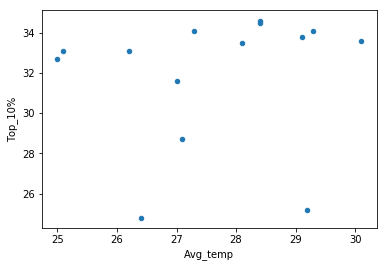

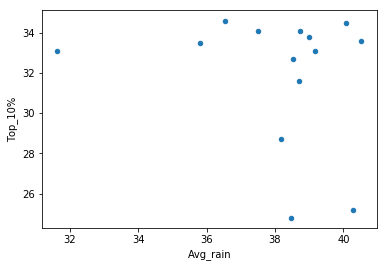

Arkansas


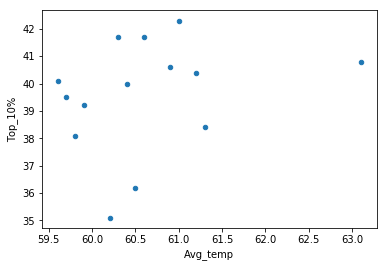

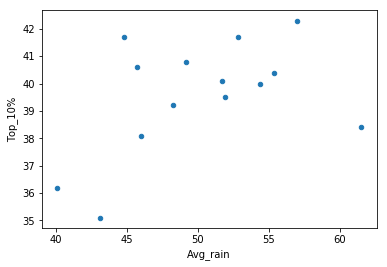

California


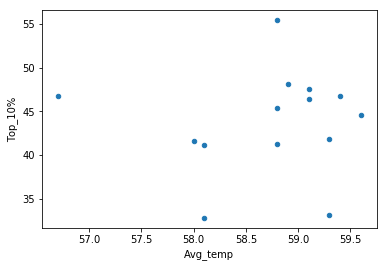

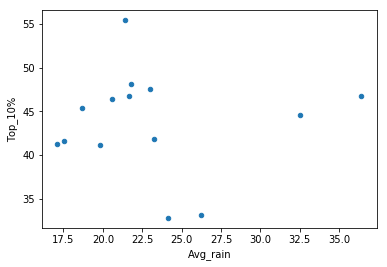

Colorado


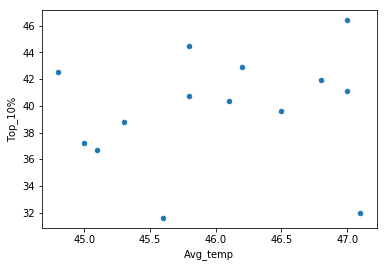

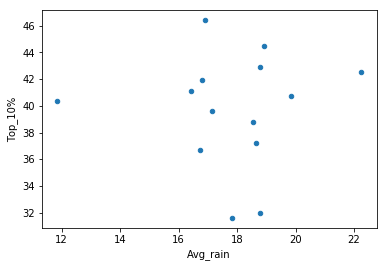

Connecticut


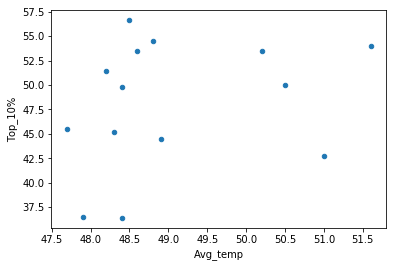

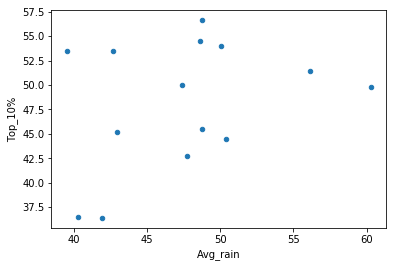

Delaware


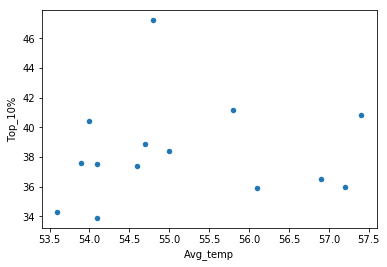

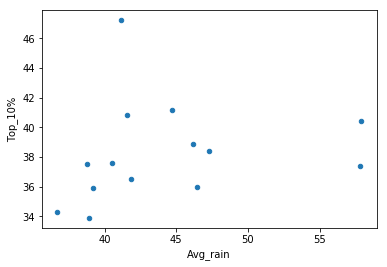

Georgia


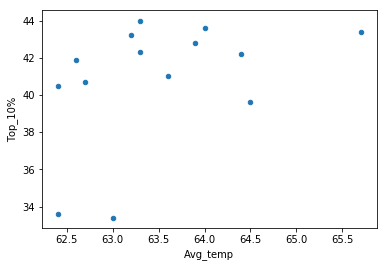

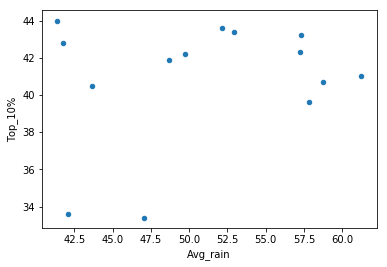

Idaho


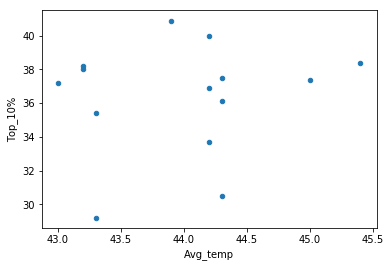

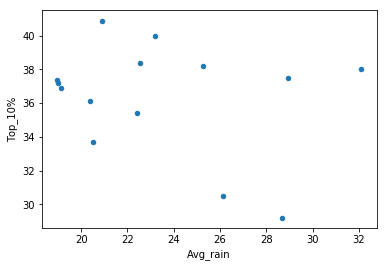

Illinois


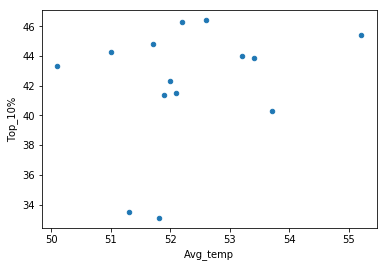

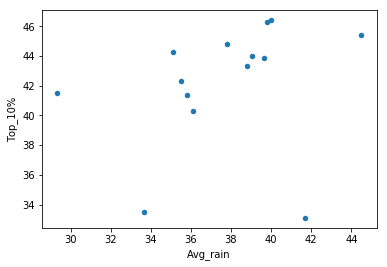

Indiana


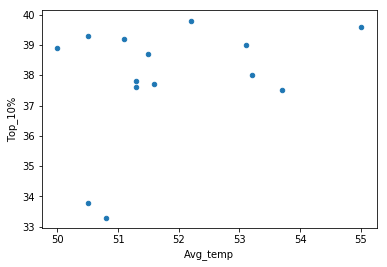

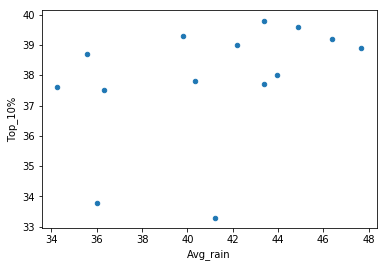

Iowa


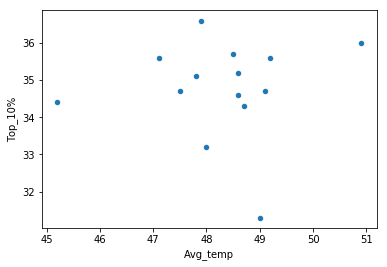

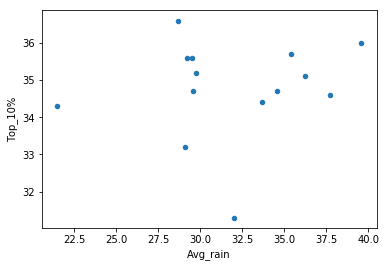

Kansas


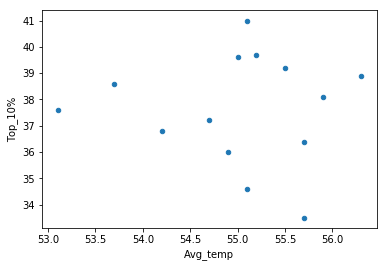

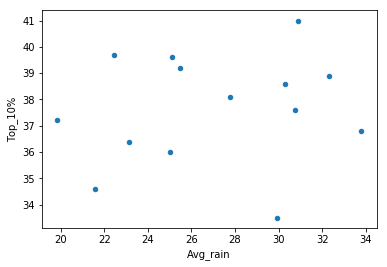

Kentucky


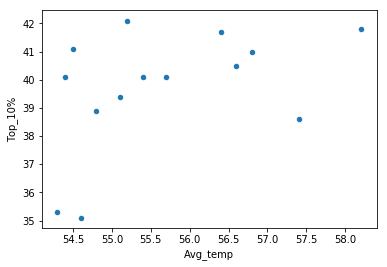

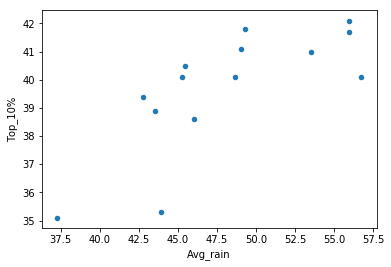

Maine


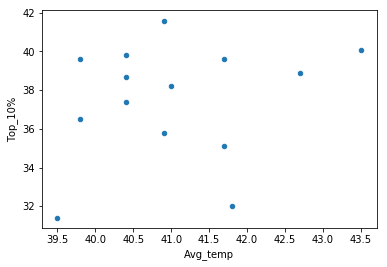

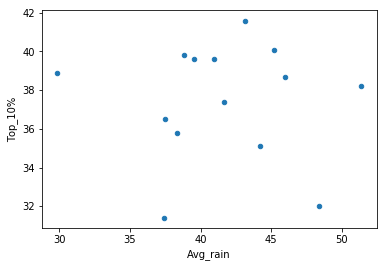

Maryland


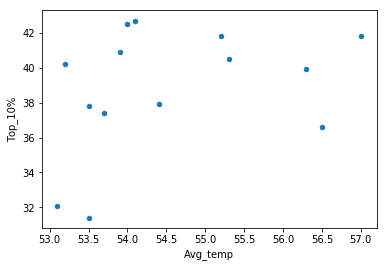

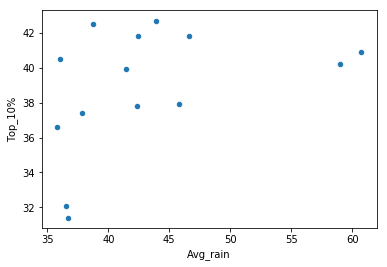

Massachusetts


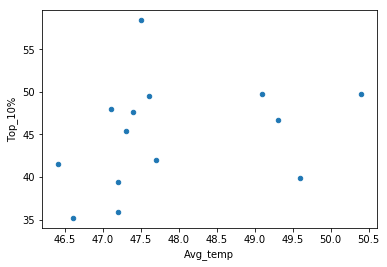

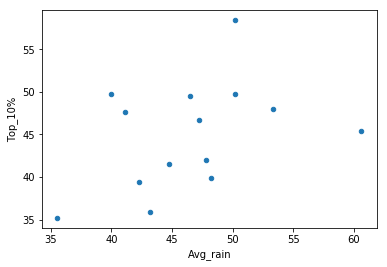

Michigan


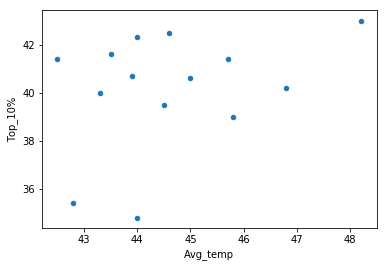

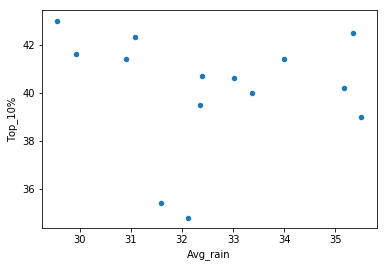

Minnesota


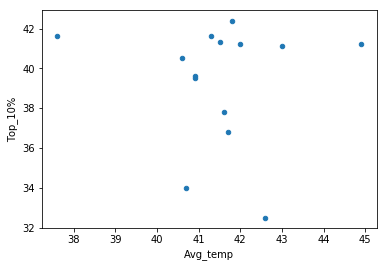

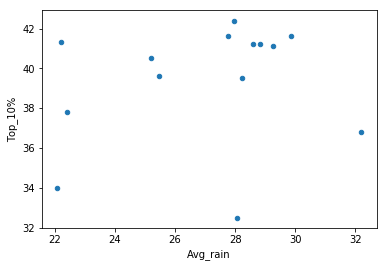

Missouri


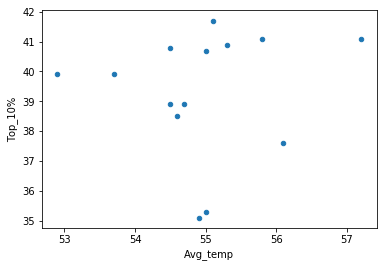

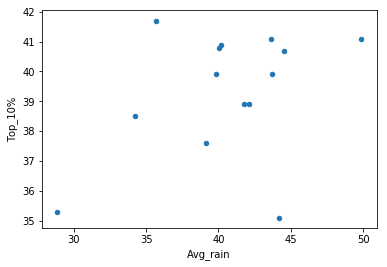

Montana


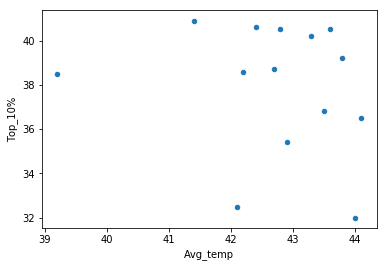

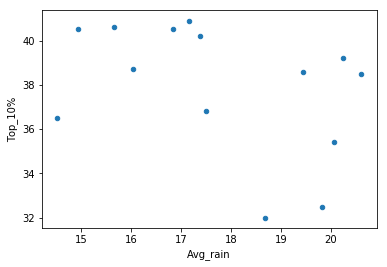

Nebraska


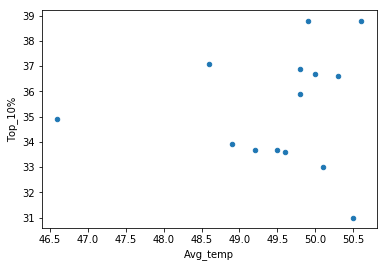

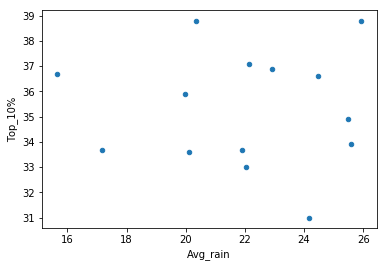

Nevada


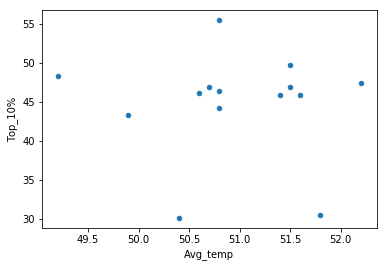

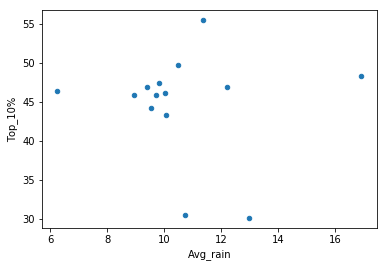

New Hampshire


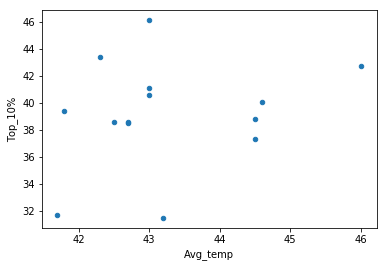

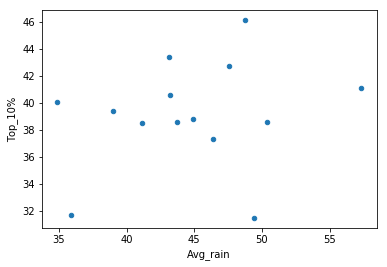

New Jersey


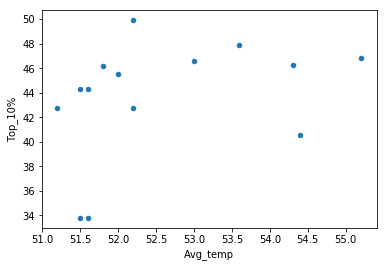

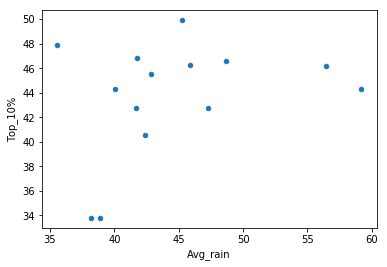

New Mexico


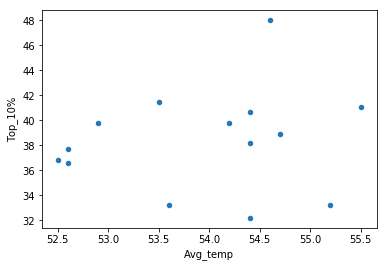

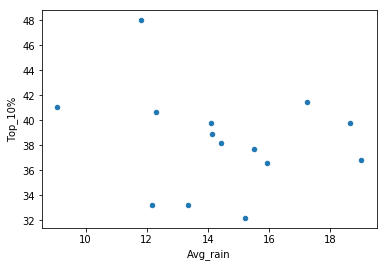

New York


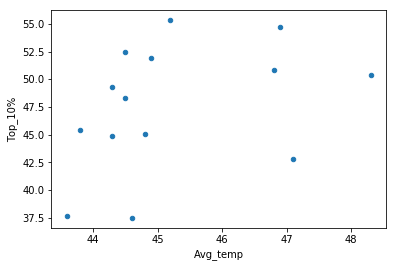

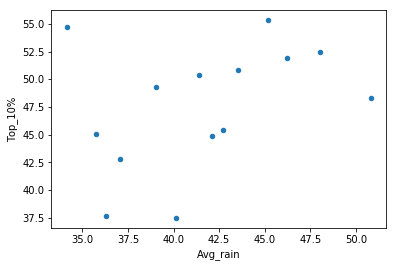

North Carolina


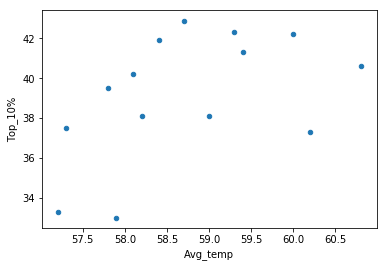

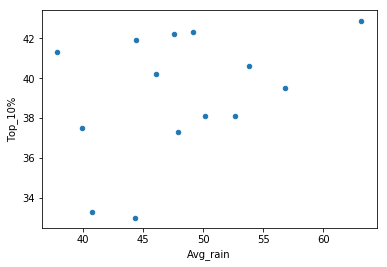

North Dakota


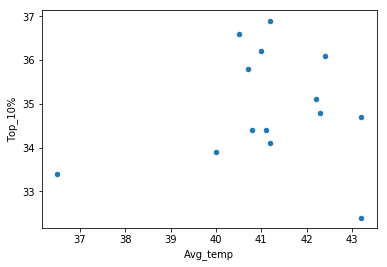

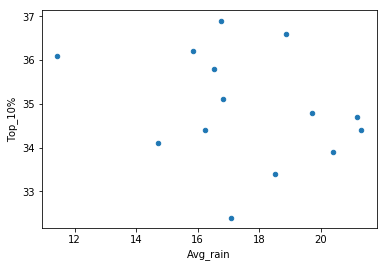

Ohio


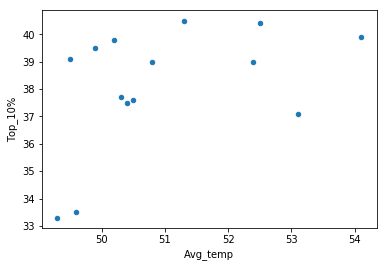

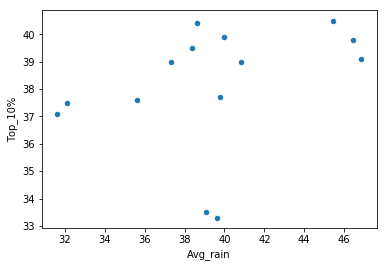

Oklahoma


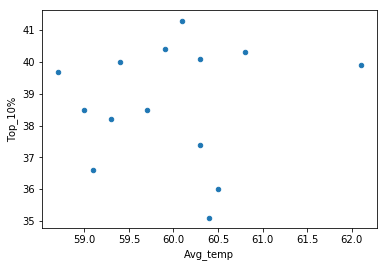

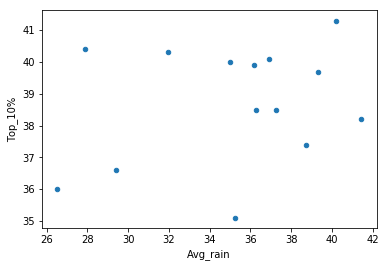

Oregon


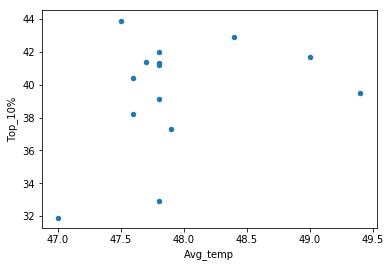

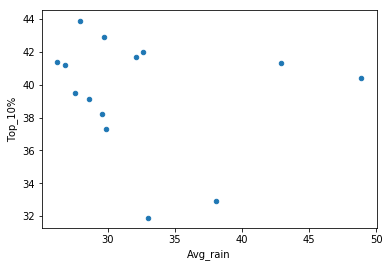

Pennsylvania


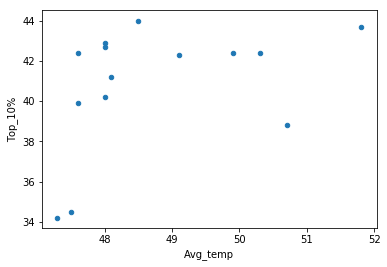

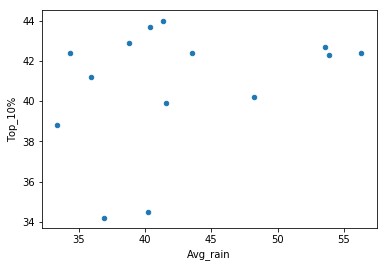

Rhode Island


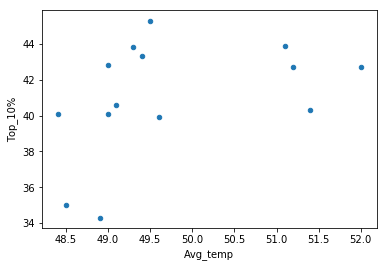

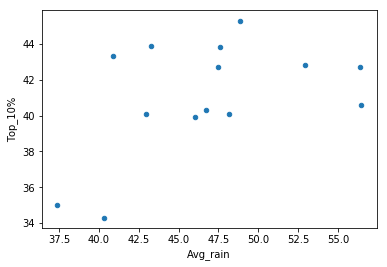

South Dakota


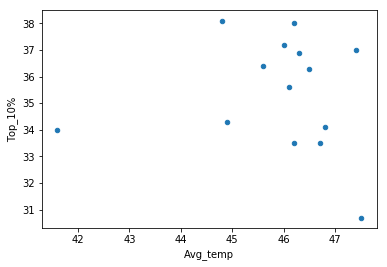

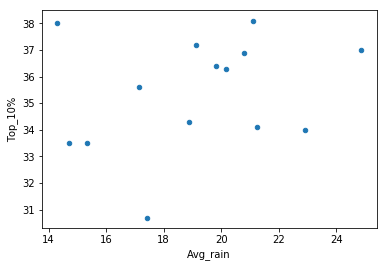

In [258]:
print('Weather and Percent Income held by Top_5% ')
things = list(df.groupby('States'))

for item in things:
    print(item[0])
    item[1].plot(kind='scatter',x='Avg_temp',y='Top_10%')
    item[1].plot(kind='scatter',x='Avg_rain',y='Top_10%')
    plt.show()

## Data Tables
This is a sanity check to see if I actually processed data correctly

In [301]:
#convert year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
#add column year to index
df=df.set_index('States','Year', append=True)
#swap indexes
df.index = df.index.swaplevel(0,1)
df

Year  Top_10%  Avg_temp  Avg_rain  Wage  Unemployment
States                                                                      
Alaska       0   1980-01-01     24.8      26.4     38.48  2.55           9.6
             1   1981-01-01     25.2      29.2     40.29  2.70           9.4
             2   1988-01-01     28.7      27.1     38.17  3.25           8.8
             3   1991-01-01     31.6      27.0     38.70  3.35           8.5
             4   1992-01-01     32.7      25.0     38.54  3.65           8.9
...                     ...      ...       ...       ...   ...           ...
South Dakota 471 2000-01-01     37.2      46.0     19.12  6.50           2.5
             472 2001-01-01     36.3      46.5     20.18  6.72           3.1
             473 2002-01-01     38.0      46.2     14.30  6.90           3.2
             474 2003-01-01     35.6      46.1     17.13  7.01           3.5
             475 2004-01-01     36.9      46.3     20.79  7.16           3.7

[476 rows x 6 columns]

It seems good!

## Reformating and Running Regression

In [302]:
y = df['Top_10%']
x = df[['Avg_temp', "Avg_rain",'Wage','Unemployment']]
x

Avg_temp  Avg_rain  Wage  Unemployment
States                                                  
Alaska       0        26.4     38.48  2.55           9.6
             1        29.2     40.29  2.70           9.4
             2        27.1     38.17  3.25           8.8
             3        27.0     38.70  3.35           8.5
             4        25.0     38.54  3.65           8.9
...                    ...       ...   ...           ...
South Dakota 471      46.0     19.12  6.50           2.5
             472      46.5     20.18  6.72           3.1
             473      46.2     14.30  6.90           3.2
             474      46.1     17.13  7.01           3.5
             475      46.3     20.79  7.16           3.7

[476 rows x 4 columns]

### Fixed Effects

In [303]:
#entity effects true is same as running fixed effects in this package - takes care of constants
reg1 = PanelOLS(y ,x,  drop_absorbed=True ).fit(debiased=True, use_lsdv=True )


#saving as latex table
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('/Users/Elzette/Desktop/Thesis_Data/Controlled_noentity10.text', 'w')
f.write(beginningtex)
f.write(reg1.summary.as_latex())
f.write(endtex)
f.close()

print(reg1.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                Top_10%   R-squared:                        0.9834
Estimator:                   PanelOLS   R-squared (Between):              0.9886
No. Observations:                 476   R-squared (Within):               0.3258
Date:                Wed, Dec 04 2019   R-squared (Overall):              0.9834
Time:                        21:17:25   Log-likelihood                   -1455.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6969.8
Entities:                          34   P-value                           0.0000
Avg Obs:                       14.000   Distribution:                   F(4,472)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):             6969.8
                            

### Random Effects 

In [304]:
reg2 = RandomEffects(y ,x).fit(debiased=True)


#saving as latex table
beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"


f = open('/Users/Elzette/Desktop/Thesis_Data/Control_Random10.text', 'w')
f.write(beginningtex)
f.write(reg2.summary.as_latex())
f.write(endtex)
f.close()


print(reg2.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                Top_10%   R-squared:                        0.8659
Estimator:              RandomEffects   R-squared (Between):              0.9816
No. Observations:                 476   R-squared (Within):               0.5599
Date:                Wed, Dec 04 2019   R-squared (Overall):              0.9783
Time:                        21:17:32   Log-likelihood                   -1108.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      762.06
Entities:                          34   P-value                           0.0000
Avg Obs:                       14.000   Distribution:                   F(4,472)
Min Obs:                       14.000                                           
Max Obs:                       14.000   F-statistic (robust):             762.06
                            